# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [3]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [4]:
baby_names = pd.read_csv('lab12_files/US_Baby_Names_right.csv')

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [5]:
baby_names

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
...,...,...,...,...,...,...,...
1016390,5647421,5647422,Seth,2014,M,WY,5
1016391,5647422,5647423,Spencer,2014,M,WY,5
1016392,5647423,5647424,Tyce,2014,M,WY,5
1016393,5647424,5647425,Victor,2014,M,WY,5


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [6]:
baby_names[0:10]

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [7]:
baby_names.drop(['Unnamed: 0','Id'],axis=1,inplace=True)

Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [8]:
m = (baby_names["Gender"] == 'M').sum()
f = (baby_names["Gender"] == 'F').sum()
print(f"ilosc mezczyzn {m} \nilosc kobiet {f}")

ilosc mezczyzn 457549 
ilosc kobiet 558846


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [9]:
q1 = baby_names.groupby('Name')
q2 = q1.count()['Count'].sort_values(ascending=False)[:10]
q2 = pd.DataFrame({'names':q2.index, 'count':q2.values})
q2

,names,count
0,Riley,1112
1,Avery,1080
2,Jordan,1073
3,Peyton,1064
4,Hayden,1049
5,Taylor,1033
6,Jayden,1031
7,Alexis,984
8,Payton,971
9,Angel,962


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

<BarContainer object of 10 artists>

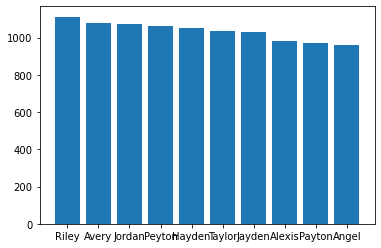

In [10]:
import matplotlib.pyplot as plt
plt.bar(q2['names'],q2['count'])

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [11]:
q3= len(baby_names['Name'])
q4 = len(baby_names['Name'].unique())
print(f'jest {q4} unikalnych imion sposrod {q3} wszystkich rekordow')

jest 17632 unikalnych imion sposrod 1016395 wszystkich rekordow


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [12]:
import numpy as np
def sample(num_values):
    q1 = baby_names.groupby('Name')
    q2 = q1.count()['Count'].sort_values(ascending=False)
    q2 = pd.DataFrame({'names':q2.index, 'count':q2.values})
    uniques = list(q2['names'])
    sum_uniques = q2['count'].sum()
    q2['count'] /= sum_uniques
    distribution = list(q2['count'])
    return np.random.choice(a=uniques,size=num_values,p=distribution)

print(sample(100))

['Daisy' 'Kate' 'Dorian' 'Paris' 'Janett' 'Conor' 'Amirah' 'Zymiere'
 'Zahir' 'Kole' 'Aleeyah' 'Tyrese' 'Lynn' 'Angela' 'Beatrice' 'Brock'
 'Bailey' 'Phillip' 'Yossi' 'Rhys' 'Amerie' 'Nickolas' 'Greta' 'Efrain'
 'Jadyn' 'Alisha' 'Karly' 'Martin' 'Denise' 'Gordon' 'Jaron' 'Rohan'
 'Jefferson' 'Brendan' 'Gideon' 'Lauren' 'Evelyn' 'Miranda' 'Samiya'
 'Reanna' 'Zayden' 'Kelsey' 'Ellianna' 'Aubri' 'Jaden' 'Bailee' 'Lewis'
 'Alyson' 'Cooper' 'Delilah' 'Bryce' 'Alfred' 'Rhys' 'Belen' 'Clark'
 'Avery' 'Akhil' 'Angelo' 'Daija' 'Mikayla' 'Maeve' 'Ari' 'Warren'
 'Fletcher' 'Roger' 'Halle' 'Ayana' 'Aileen' 'Lara' 'Calleigh' 'Penelope'
 'Javon' 'Moises' 'Liberty' 'Aldo' 'Shaniya' 'Stephanie' 'Trinidad'
 'Caleigh' 'Rodney' 'Alexis' 'Everett' 'Damaris' 'Kylee' 'Zyion' 'Rylie'
 'Brodie' 'Felicity' 'Danna' 'Isabelle' 'Anissa' 'Carmela' 'Skyler'
 'Dakota' 'Harmony' 'Nakia' 'Karsen' 'Payson' 'Abby' 'Catarina']


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [13]:
# 1 Riley- widac w zadaniu u gory
# 2
mean = q2['count'].mean()
median = q2['count'].median()
std = q2['count'].std()
print(f'mean {mean}, median {median}, std {std}')

mean 1035.9, median 1041.0, std 49.969879816634425


## Część II

Krok 1: Wczytaj dane

In [14]:
import pandas as pd
occupation = pd.read_csv('lab12_files/ocupation.csv',sep='|')
len(occupation)

943

Krok 2: Podejrzyj pierwsze 25 rekordów

In [15]:
occupation[:25]

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [16]:
occupation[-25:]

,user_id,age,gender,occupation,zip_code
918,919,25,M,other,14216
919,920,30,F,artist,90008
920,921,20,F,student,98801
921,922,29,F,administrator,21114
922,923,21,M,student,E2E3R
923,924,29,M,other,11753
924,925,18,F,salesman,49036
925,926,49,M,entertainment,01701
926,927,23,M,programmer,55428
927,928,21,M,student,55408


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [17]:
n_col = len(occupation.columns)
n_ob = len(occupation)
print(f"jest {n_col} kolumn i {n_ob} obserwacji")

jest 5 kolumn i 943 obserwacji


Krok 5: Wypisz nazwy kolumn

In [18]:
print(f"nazwy kolumn: {occupation.columns}")

nazwy kolumn: Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')


Krok 6: Ile różnych zawodów jest w zbiorze?

In [19]:
len(occupation['occupation'].unique())

21

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

In [20]:
q6 = occupation.groupby('occupation').count()
q6 = pd.DataFrame({'num':q6['user_id']})
q6 =  q6.reset_index()
#q6 = q6.drop(['occupation'],axis=1)
top10 = q6.nlargest(10,columns=['num'])
top10

,occupation,num
18,student,196
13,other,105
3,educator,95
0,administrator,79
4,engineer,67
14,programmer,66
10,librarian,51
20,writer,45
6,executive,32
17,scientist,31


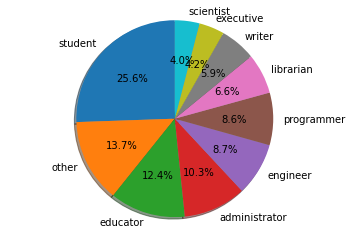

In [21]:
import matplotlib.pyplot  as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = top10['occupation']
sizes = top10['num']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


<Figure size 4000x4000 with 0 Axes>

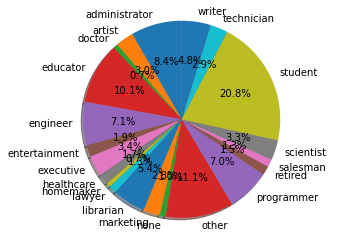

In [22]:
from matplotlib.pyplot import figure
labels = q6['occupation']
sizes = q6['num']
figure(figsize=(20,20), dpi=200)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

In [75]:
top10_labels = top10['occupation']
counter = dict()
# for job in top10_labels:
mask1 = occupation['occupation'] == 'student'
mask2 = occupation['gender'] == 'F'
len(occupation.loc[(mask1 & mask2)])
for job in top10_labels:
    mask = occupation['occupation'] == job
    mask_m = occupation['gender'] == 'M'
    mask_f = occupation['gender'] == 'F'
    count_m = len(occupation.loc[(mask & mask_m)])
    count_f = len(occupation.loc[(mask & mask_f)])
    counter.update({job:(count_m,count_f)})

gender = pd.DataFrame(counter,index=['Male','Female'])
m_val = [gender.iat[0,i] for i in range(len(gender.columns))]
f_val = [gender.iat[1,i] for i in range(len(gender.columns))]

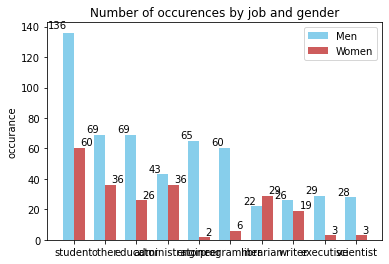

In [83]:
ind = np.arange(len(gender.columns))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, m_val , width,yerr=(0 for i in range(len(gender.columns))),
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, f_val, width,yerr=(0 for i in range(len(gender.columns))),
                color='IndianRed', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('occurance')
ax.set_title('Number of occurences by job and gender')
ax.set_xticks(ind)
ax.set_xticklabels(list(gender.columns))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

plt.show()

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<BarContainer object of 21 artists>

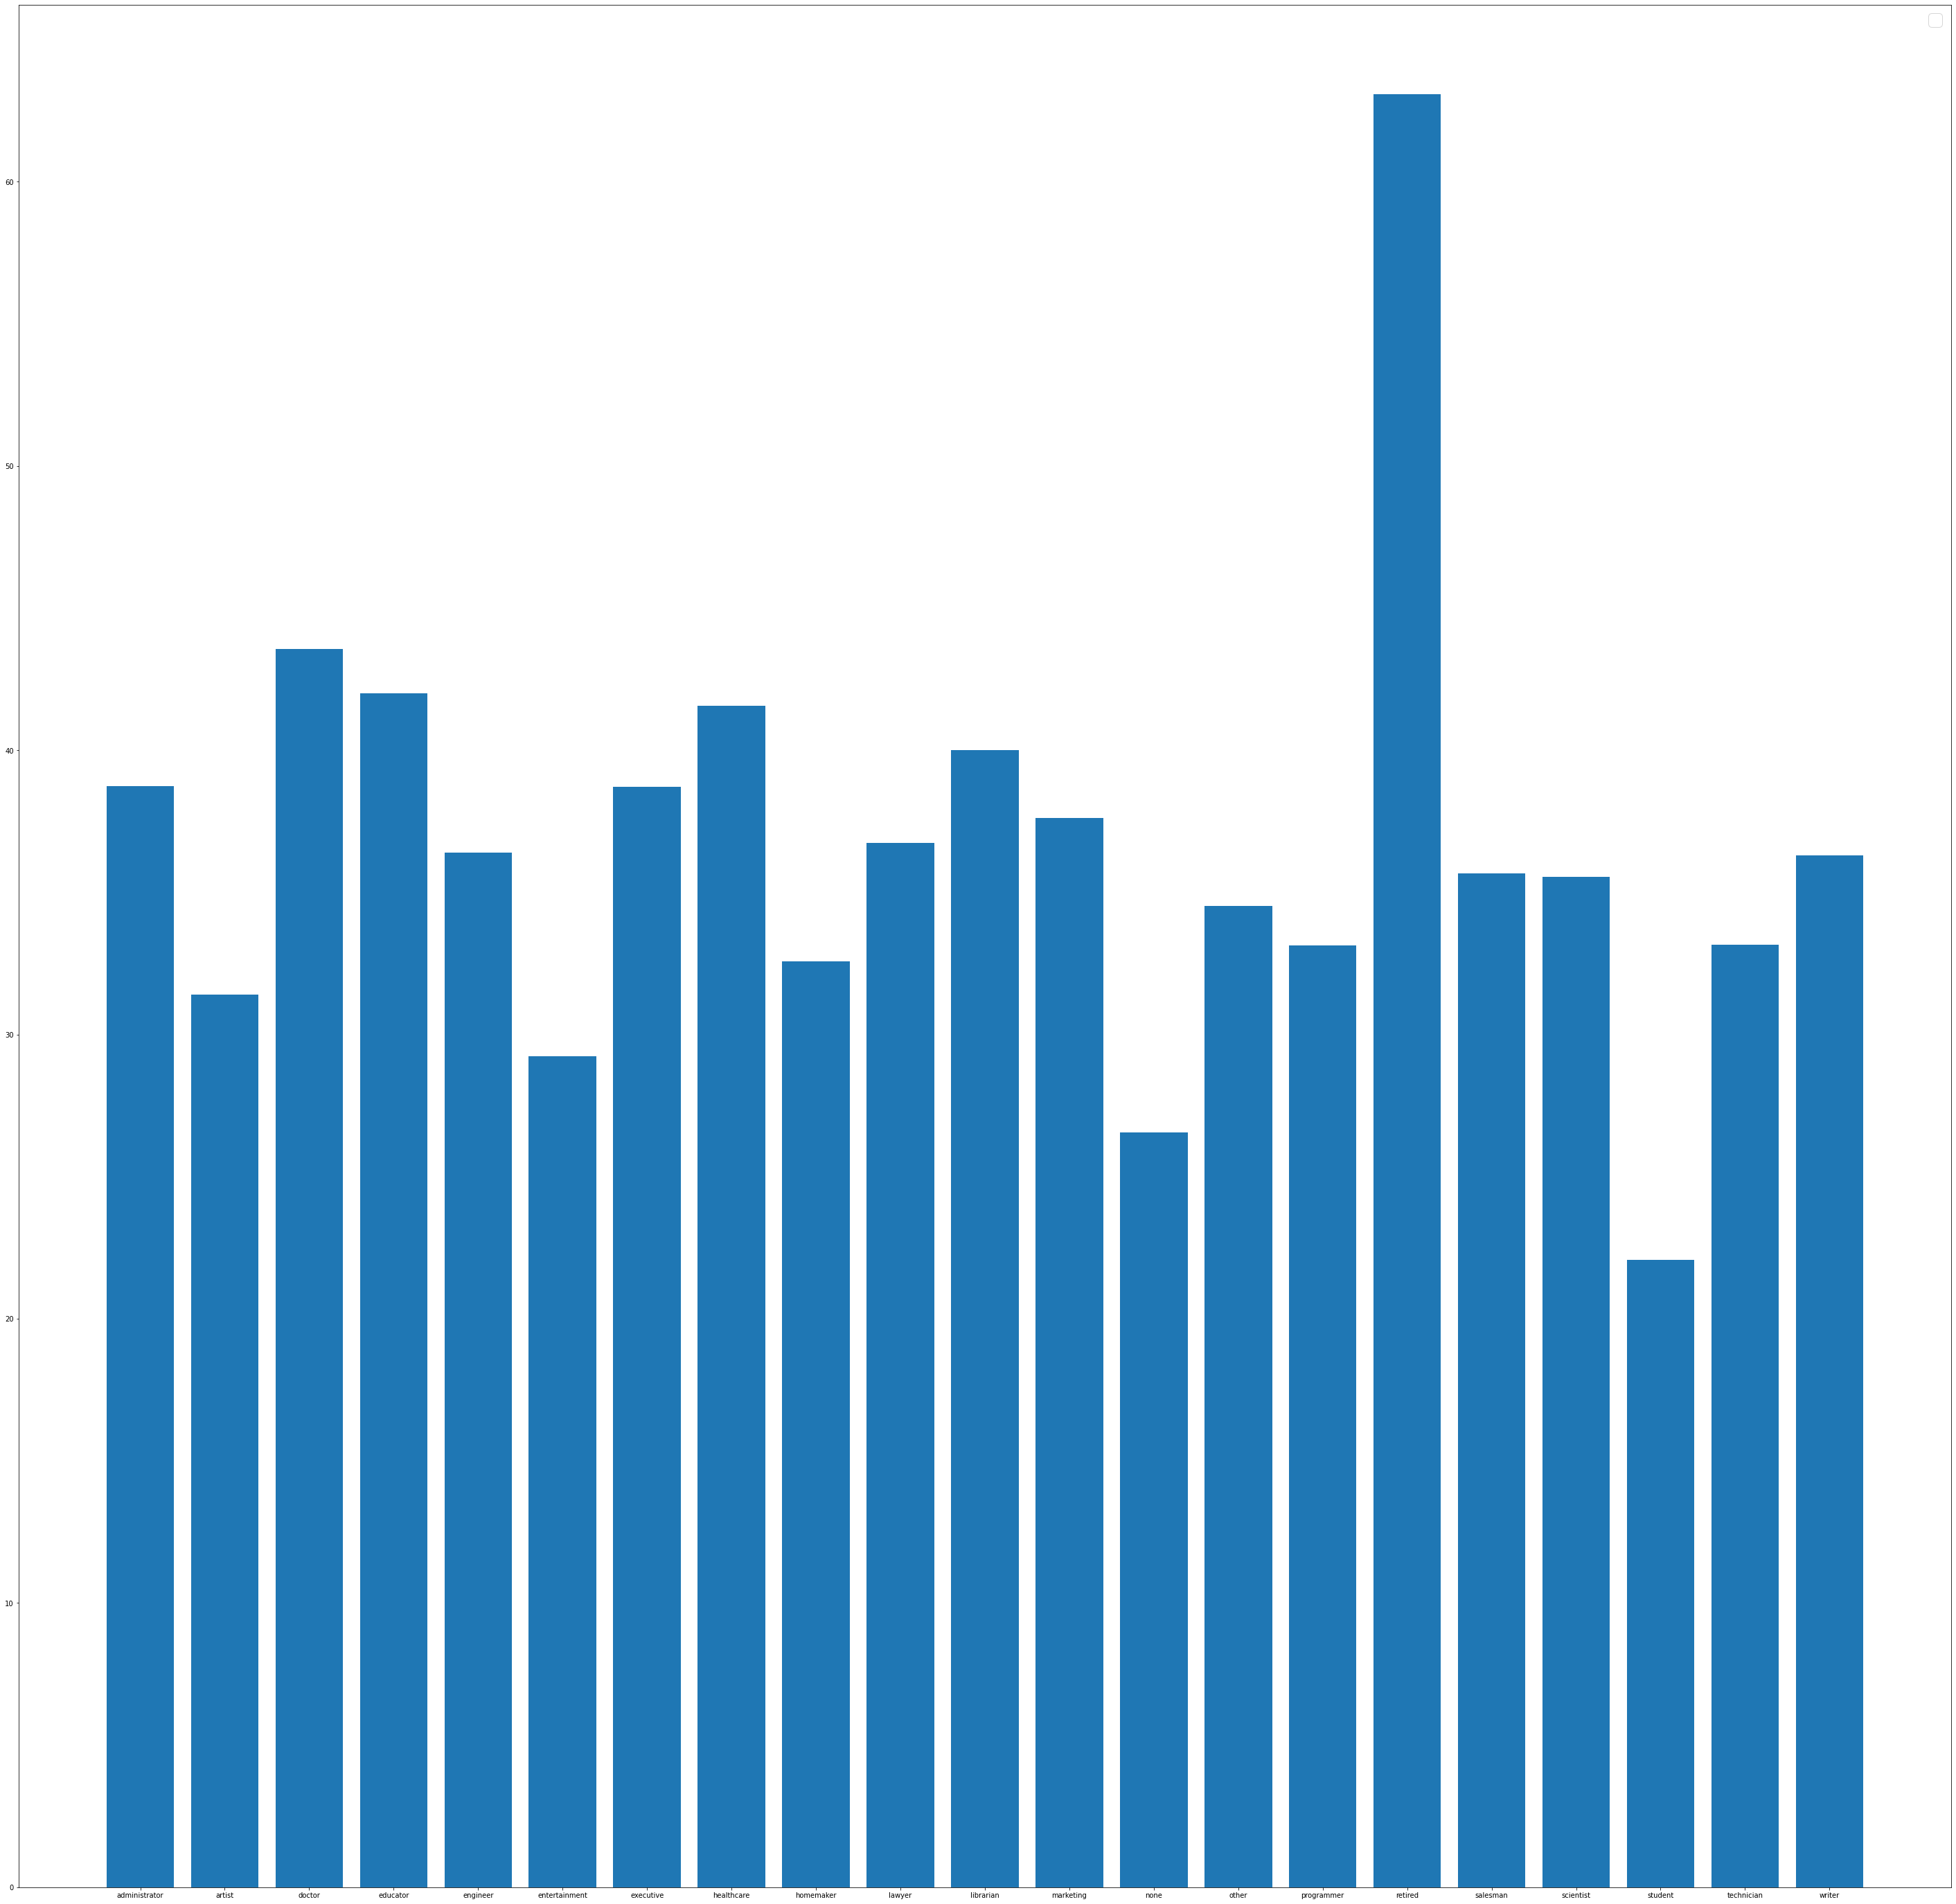

In [106]:
query9 = occupation.groupby('occupation').mean()
agelist = list(query9['age'])
joblist = list(query9.index)
plt.figure(figsize=(50,50))
plt.legend(loc='best', fontsize=25)
plt.bar(joblist,agelist)

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

In [127]:
query10 = occupation[occupation['gender'] == 'F']
female_age = query10.groupby('occupation').mean()['age']
query11 = occupation[occupation['gender'] == 'M']
male_age = query11.groupby('occupation').mean()['age']


20

ValueError: shape mismatch: objects cannot be broadcast to a single shape

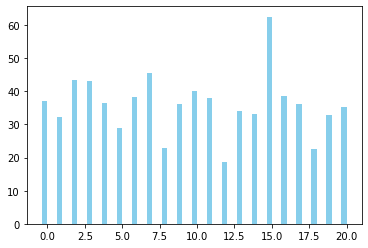

In [124]:
ind = np.arange(len(male_age.index))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, list(male_age) , width,yerr=(0 for i in range(len(male_age.index))),
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, list(female_age), width,yerr=(0 for i in range(len(female_age.index))),
                color='IndianRed', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('mean years old')
ax.set_title('average age by job')
ax.set_xticks(ind)
ax.set_xticklabels(list(male_age.index))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

plt.show()